<a href="https://colab.research.google.com/github/dragoa/MachineLearning/blob/main/ML/02-Ridge_Regression/01-Ridge-sklrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(11)

In [ ]:
def oracle(x):
  #return x
  #return x**2
  return np.sinc(3*x)

In [ ]:
n = 100 # number of samples
d = 1 # number of dimensions
sigma = .01 # measurament noise

In [ ]:
# Our Data
x = np.random.rand(n)
y = oracle(x) + sigma*np.random.randn(n) # gaussian noise added to the labels
print(x.shape)
print(y.shape)

(100,)
(100,)


In [ ]:
lam = 1

Instead of creating everytime the model, I can just use one that is already implemented in the sklearn library. I use the **Ridge** model

In [ ]:
from sklearn.linear_model import Ridge

# defining the model
M = Ridge(alpha = lam, fit_intercept = False, solver = 'cholesky')
# data in matricial form
X = np.asarray(np.asmatrix(x).transpose())
M.fit(X,y)

ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asarray(np.asmatrix(xs).transpose())
# predictions
ys = M.predict(Xs)

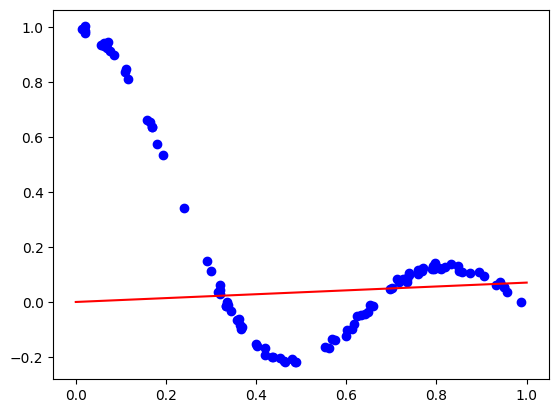

In [ ]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo')
ax.plot(Xs,ys,'r')

In [ ]:
X = np.asmatrix(x).transpose()
yy = np.asmatrix(y).transpose()
w = np.linalg.solve(
    np.matmul(np.transpose(X),X)+lam*np.eye(d),
    np.matmul(np.transpose(X),yy))

# difference between w and the params in the model
np.sum(np.abs(w-M.coef_))

1.3877787807814457e-17

Now If I consider the kernels for creating a non linear model:
I use a **Kernel Ridge** model

In [ ]:
lam = .1
gam = 10

In [ ]:
from sklearn.kernel_ridge import KernelRidge
M = KernelRidge(alpha = lam, kernel = 'rbf', gamma = gam)
X = np.asarray(np.asmatrix(x).transpose())
M.fit(X,y)
ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asarray(np.asmatrix(xs).transpose())
ys = M.predict(Xs)

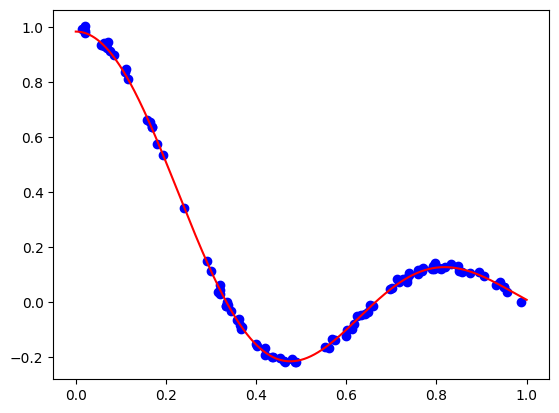

In [ ]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo')
ax.plot(Xs,ys,'r')